# DSCI 503 – Project 03
### Pradeep k Timsina

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
### Loading data into a dataframe and determining the shape and inspecting the columns

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


##  determining the size of the dataset. 

In [3]:
diamonds.shape

(53940, 10)

## inspecting the distribution of the columns in diamonds

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
### using filters to view 5 least expensive,5 largest diamonds from the dataset

In [5]:
diamonds.loc[:, [ 'price', 'carat', 'cut', 'color','clarity']].sort_values(by='price',ascending = False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


### now viewing information about the 5 least expensive diamonds in the dataset 


In [6]:
diamonds.loc[:, [ 'price', 'carat', 'cut', 'color','clarity']].sort_values(by='price').head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


### now viewing information about the 5 largest diamonds in the dataset with an ideal cut. 

In [7]:
diamonds.loc[:, [ 'price', 'carat', 'cut', 'color','clarity']].loc[diamonds.loc[:, [ 'price', 'carat', 'cut', 'color','clarity']].cut == 'Ideal'].sort_values(by='carat',ascending = False).head(5)


,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


###  viewing information about the 5 largest diamonds in the dataset with an fair cut

In [8]:
diamonds.loc[:, [ 'price', 'carat', 'cut', 'color','clarity']].loc[diamonds.loc[:, [ 'price', 'carat', 'cut', 'color','clarity']].cut == 'Fair'].sort_values(by='carat',ascending = False).head(5)


,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


# Part 3: Working with Categorical Variables
### creating a color palette and unique values of clarity,cut and colors of diamonds

In [9]:
clarity_levels =diamonds.clarity.unique()
cut_levels = diamonds.cut.unique()
color_levels = diamonds.color.unique()

### using the lists to communicate to Pandas the correct order for the levels of the three categorical variables

In [10]:
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)

###  creating list of named colors to serve as palettes to be used for visualizations

In [11]:
clarity_pal= ['#48D1CC','#C0FF3E','#9AFF9A','#9B30FF','#54FF9F','#836FFF','#EE82EE','#FFC1C1'] 
color_pal=['#9AFF9A','#9B30FF','#54FF9F','#836FFF','#EE82EE']
cut_pal = ['#48D1CC','#C0FF3E','#9AFF9A','#9B30FF','#54FF9F','#836FFF','#EE82EE']

# Part 4: Displaying Counts for Categorical Variables
### counting the number of diamonds for each level of cut

In [12]:
diamonds.loc[:,'cut'].sort_index().value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

### counting the number of diamonds for each level of color. 

In [13]:
diamonds.loc[:,'color'].sort_index().value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

### counting the number of diamonds for each level of clarity. 

In [14]:
diamonds.loc[:,'clarity'].sort_index().value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Part 5: Scatterplots of Price Against Carat
### plotting scatterplot for price against carat, with different color for different clarity levels.

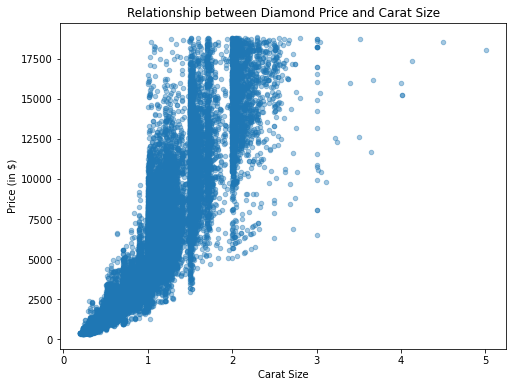

In [15]:
plt.figure(figsize=[8,6])
plt.scatter(x=diamonds.carat, y=diamonds.price, alpha =0.4, s= 20)
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()


### reproducing the plot from above,  coloring the points according to their clarity.

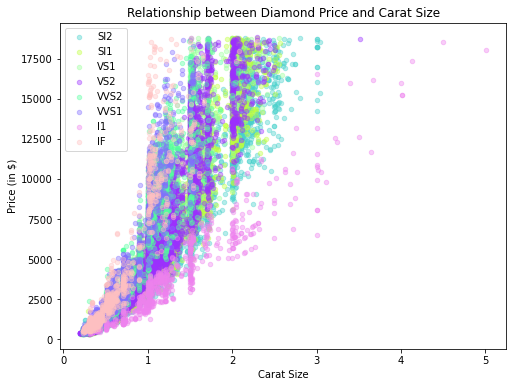

In [16]:
plt.figure(figsize=[8,6])
for itr in range(0, len(clarity_levels)):
    plt.scatter(x=diamonds.loc[diamonds.clarity==clarity_levels[itr],'carat'], label =clarity_levels[itr] ,y=diamonds.loc[diamonds.clarity==clarity_levels[itr],'price'], alpha =0.4, s= 20, c = clarity_pal[itr] )    
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.legend()
plt.show()

### separating the points for each of the eight clarity levels into its own subplot.

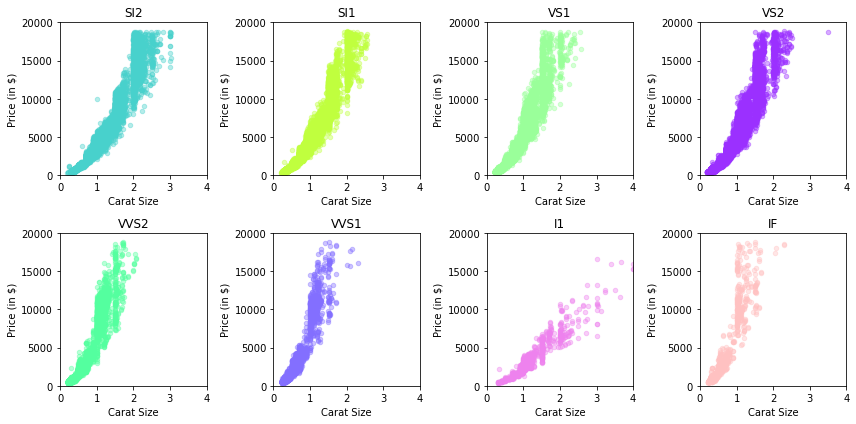

In [17]:
plt.figure(figsize=[12,6])
for itr in range(0, len(clarity_levels)):
    plt.subplot(2,4,itr+1)
    plt.scatter(x=diamonds.loc[diamonds.clarity==clarity_levels[itr],'carat'], label =clarity_levels[itr] ,y=diamonds.loc[diamonds.clarity==clarity_levels[itr],'price'], alpha =0.4, s= 20, c = clarity_pal[itr] )    
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.xlim([0, 4])
    plt.ylim([0, 20000])
    plt.title(clarity_levels[itr])
plt.tight_layout()
plt.show()

# Part 6: Applying Logarithmic Transformations
### adding two new columns to the diamonds,  to store the transformed variables. 

In [18]:
diamonds['ln_carat'] = np.log(diamonds.carat)
diamonds['ln_price'] = np.log(diamonds.price)


###  using histograms to explore the distribution of the diamond prices, and the log of the diamond prices. 


(array([ 247., 1306., 2556., 3862., 4328., 4072., 2616., 2048., 3310.,
        3061., 3093., 2854., 3904., 3967., 3135., 2437., 2166., 1889.,
        1624., 1465.]),
 array([5.78689738, 5.98969425, 6.19249112, 6.39528799, 6.59808487,
        6.80088174, 7.00367861, 7.20647548, 7.40927235, 7.61206922,
        7.81486609, 8.01766296, 8.22045984, 8.42325671, 8.62605358,
        8.82885045, 9.03164732, 9.23444419, 9.43724106, 9.64003793,
        9.84283481]),
 <BarContainer object of 20 artists>)

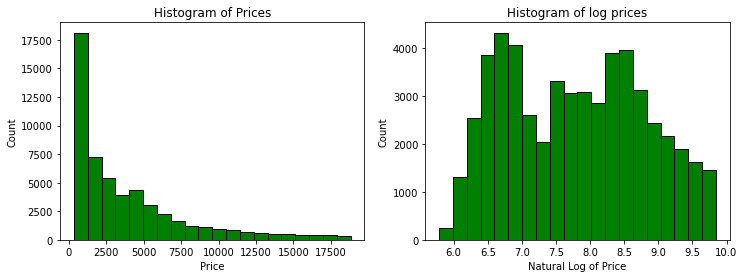

In [19]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')
plt.hist(diamonds.price, bins=20, edgecolor = 'k',color='green')
plt.subplot(1,2,2)
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of log prices')
plt.hist(diamonds.ln_price, bins=20, edgecolor = 'k',color='green')

### using histograms to explore the distribution of the carat sizes, and the log of the carat sizes.

(array([3.190e+02, 9.520e+02, 7.021e+03, 4.402e+03, 4.485e+03, 3.697e+03,
        3.776e+03, 4.568e+03, 2.788e+03, 4.430e+03, 7.453e+03, 3.554e+03,
        3.372e+03, 9.270e+02, 1.797e+03, 3.380e+02, 4.700e+01, 6.000e+00,
        6.000e+00, 2.000e+00]),
 array([-1.60943791e+00, -1.44839422e+00, -1.28735053e+00, -1.12630684e+00,
        -9.65263147e-01, -8.04219456e-01, -6.43175764e-01, -4.82132073e-01,
        -3.21088381e-01, -1.60044690e-01,  9.99001331e-04,  1.62042693e-01,
         3.23086384e-01,  4.84130075e-01,  6.45173767e-01,  8.06217458e-01,
         9.67261150e-01,  1.12830484e+00,  1.28934853e+00,  1.45039222e+00,
         1.61143592e+00]),
 <BarContainer object of 20 artists>)

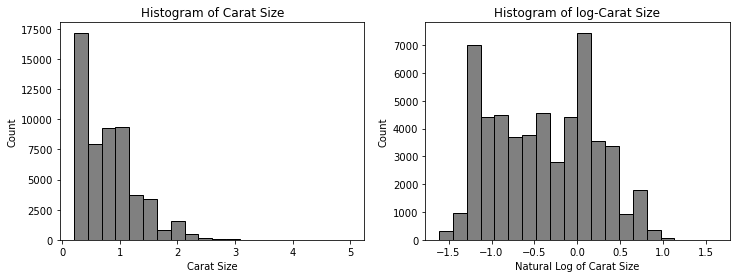

In [20]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Size')
plt.hist(diamonds.carat, bins=20, edgecolor = 'k',color= 'grey')
plt.subplot(1,2,2)
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of log-Carat Size')
plt.hist(diamonds.ln_carat, bins=20, edgecolor = 'k',color= 'grey')

# Part 7: Scatterplot of Transformed Variables
### creating a scatterplot of ln_price against ln_carat, with points colored according to their clarity


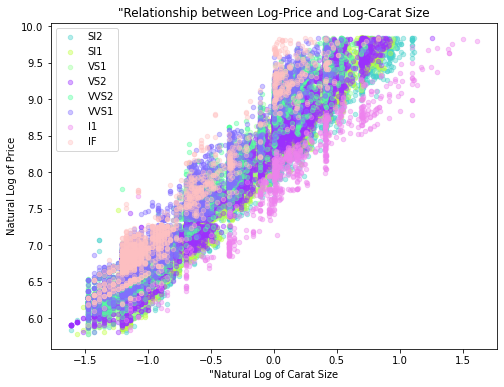

In [21]:
plt.figure(figsize=[8,6])
for itr in range(0, len(clarity_levels)):
    plt.scatter(x=diamonds.loc[diamonds.clarity==clarity_levels[itr],'ln_carat'], label =clarity_levels[itr] ,y=diamonds.loc[diamonds.clarity==clarity_levels[itr],'ln_price'], alpha =0.4, s= 20, c = clarity_pal[itr] )    
plt.xlabel('"Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('"Relationship between Log-Price and Log-Carat Size')
plt.legend()
plt.show()

# Part 8: Grouping by Cut
### creating a grouped DataFrame displaying the mean price and carat size for each cut level

In [22]:
gb_cut = diamonds.loc[:, [ 'price', 'carat', 'cut']].groupby("cut").mean()
gb_cut

,price,carat
cut,,
Ideal,3457.541970,0.702837
Premium,4584.257704,0.891955
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Fair,4358.757764,1.046137


### using bar charts to graphically display the information from the gb_cut DataFrame 

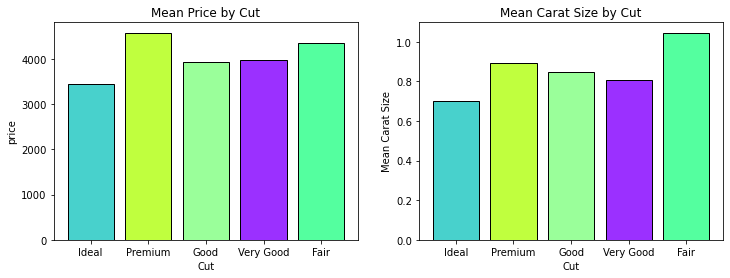

In [23]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.bar(x=gb_cut.index, height=gb_cut.loc[:,'price'], color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('price')
plt.title('Mean Price by Cut')
plt.subplot(1,2,2)
plt.bar(x=gb_cut.index, height=gb_cut.loc[:,'carat'], color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')
plt.show()

# Part 9: Grouping by Color
### creating a grouped DataFrame displaying the mean price and carat size for each color level 

In [24]:
gb_color = diamonds.loc[:, [ 'color', 'price', 'carat']].groupby("color").mean()
gb_color

,price,carat
color,,
E,3076.752475,0.657867
I,5091.874954,1.026927
J,5323.818020,1.162137
H,4486.669196,0.911799
F,3724.886397,0.736538
G,3999.135671,0.771190
D,3169.954096,0.657795


### using bar charts to graphically display the information from gb_color

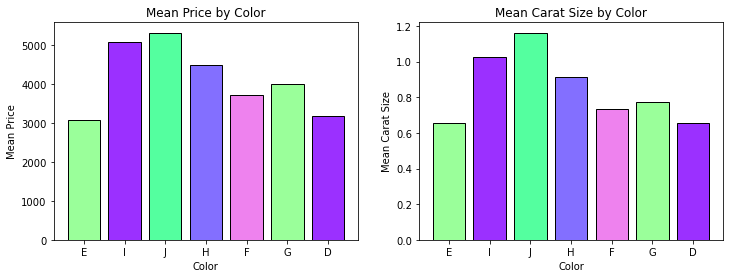

In [25]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.bar(x=gb_color.index, height=gb_color.loc[:,'price'], color=color_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')
plt.subplot(1,2,2)
plt.bar(x=gb_color.index, height=gb_color.loc[:,'carat'], color=color_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Color')
plt.show()

# Part 10: Grouping by Clarity
### creating a grouped DataFrame displaying the mean price and carat size for each clarity level

In [26]:
gb_clarity = diamonds.loc[:, [ 'clarity', 'price', 'carat']].groupby("clarity").mean()
gb_clarity

,price,carat
clarity,,
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS1,3839.455391,0.727158
VS2,3924.989395,0.763935
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
I1,3924.168691,1.283846
IF,2864.839106,0.505123


### using bar charts to graphically display the information from the DataFrame gb_clarity

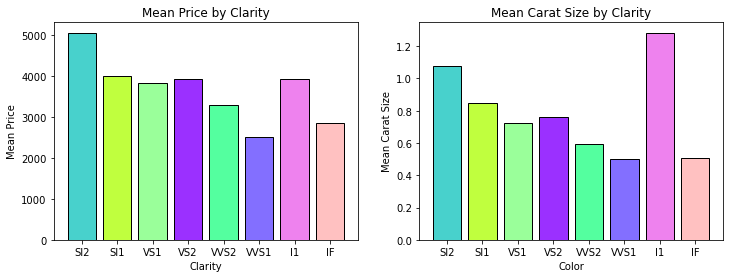

In [27]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.bar(x=gb_clarity.index, height=gb_clarity.loc[:,'price'], color=clarity_pal, edgecolor='black')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.title('Mean Price by Clarity')
plt.subplot(1,2,2)
plt.bar(x=gb_clarity.index, height=gb_clarity.loc[:,'carat'], color=clarity_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Clarity')
plt.show()